In [17]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

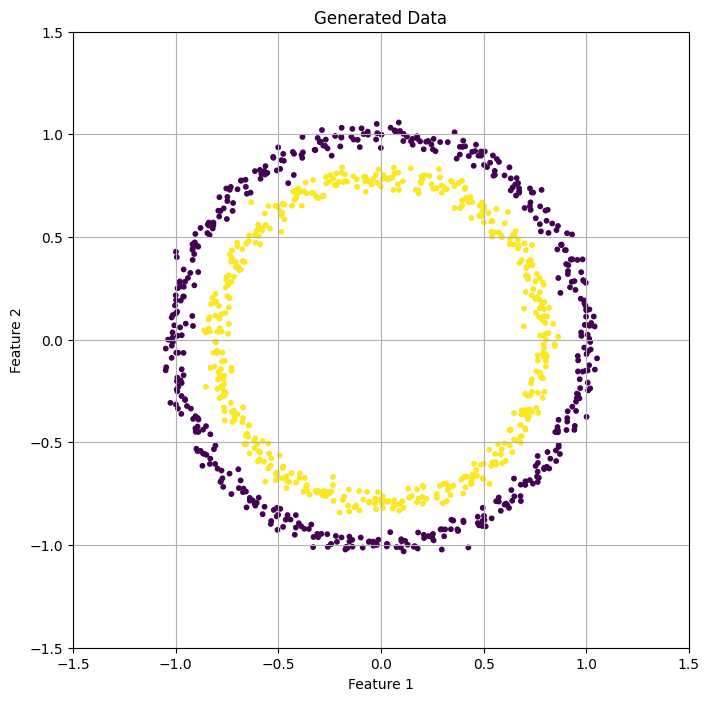

In [18]:
nSamples = 1000

X, y = make_circles(n_samples=nSamples, noise=0.03)
plt.figure(figsize=(8, 8))
plt.scatter(X[:, 0], X[:, 1], c=y, s=10, cmap='viridis')
plt.title('Generated Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.grid()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

In [19]:
circles = pd.DataFrame(X, columns=['X1', 'X2'])
circles['Label'] = y
circles

,X1,X2,Label
0,-0.056830,0.772921,1
1,0.764731,-0.600055,0
2,-0.168355,-1.008184,0
3,-0.414330,-0.914977,0
4,0.973314,0.199843,0
...,...,...,...
995,-0.735548,0.415173,1
996,0.602255,-0.803050,0
997,-0.023270,-0.991881,0
998,0.537035,0.575823,1


In [20]:
X.shape, y.shape

((1000, 2), (1000,))

In [21]:
import torch
torch.__version__

'2.4.0+rocm6.3.2'

In [22]:
X = torch.from_numpy(X).float()
y = torch.from_numpy(y).float()

In [23]:
X[:5], y[:5] 

(tensor([[-0.0568,  0.7729],
         [ 0.7647, -0.6001],
         [-0.1684, -1.0082],
         [-0.4143, -0.9150],
         [ 0.9733,  0.1998]]),
 tensor([1., 0., 0., 0., 0.]))

In [24]:
X.dtype, y.dtype, type(X)

(torch.float32, torch.float32, torch.Tensor)

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

(torch.Size([800, 2]),
 torch.Size([800]),
 torch.Size([200, 2]),
 torch.Size([200]))

In [26]:
from torch import nn

In [27]:
class CircleModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(2, 10)
        self.layer2 = nn.Linear(10, 1)
    
    def forward(self, x):
        return self.layer2(self.layer1(x))

In [28]:
model = CircleModel()
model

CircleModel(
  (layer1): Linear(in_features=2, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=1, bias=True)
)

In [29]:
with torch.inference_mode():
    untrainedPreds = model(X_test)
untrainedPreds[:5], y_test[:5]

(tensor([[-0.3670],
         [-0.4772],
         [-0.3946],
         [-0.3819],
         [-0.4923]]),
 tensor([1., 0., 1., 1., 1.]))